# Letterboxd Analysis Project: Exploration

**Author:** Sierra Stanton
***

![Cinema Amy Poehler Tina Fey](../images/amy-poehler-tina-fey-cinema.gif)

## Overview

This project shows an analysis of the top 4,000 users on Letterboxd and their contributed film ratings in order for us to create a recommendation system that predicts which films users will most enjoy.

## Problem

With all of the choices available to us across a myriad of sources, we need better help interpreting the signal from the noise. In this use case, we'll help film fans find their next favorite film by using an extensive database of films and ratings to better diagnose what they'll like and recommend films accordingly.

## Data Understanding

We're using data from an app called Letterboxd, which separates itself from the pack due to it's emphasis on community and social networking around film critique. In fact, this app was first recommended to me a few years back by a friend working at the Britism Film Institute (BFI) and who happened to have a taste similar to mine. My experience with Letterboxd made me particularly interested in the app's development and future value. They've experienced immense growth in the past few years - XY stat.

Letterboxd, which dubs itself a "social film discovery platform", has the ability to follow critics and see their evaluation of a wide variety of films. However, there has yet to be a way to get personalized recommendations based on your film preferences. This project solves exactly that and provides a way for Letterboxd users to get a record of the films they're most likely to enjoy.

Sam Learner scrapes data from Letterboxd and hosts the datasets we used on Kaggle [here](https://www.kaggle.com/samlearner/letterboxd-movie-ratings-data). Note - for our purposes, we choose not to use his included `Users` dataset.

Our two datasets are the following:
*  The Movie Data (`movie_data.csv`): this dataset gives us each film's unique ID, title, and year of release.
*  The Ratings Data (`ratings_export.csv`): this dataset shows each rating from 1-10 that Letterboxd's top 4,000 users have submitted according to the particular film. Note that on the app this is shown as 1-5, however the 1-10 split data reflects each half star by assigning it a number (4.5 becomes 9, 5 becomes 10).

**NOTE:** Due to the lengthy size of the dataset (over 8M film review records), I recommend heading to the link above for download instructions and in order to get the very latest version of scraped data.

In [1]:
# Import standard packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

### Import: Movie Data

In [2]:
# import movie_data.csv from our data folder

df_mov = pd.read_csv('../data/movie_data.csv')
display(df_mov.info())
df_mov.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251066 entries, 0 to 251065
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   _id            251066 non-null  object 
 1   image_url      233307 non-null  object 
 2   movie_id       251064 non-null  object 
 3   movie_title    249625 non-null  object 
 4   year_released  245678 non-null  float64
dtypes: float64(1), object(4)
memory usage: 9.6+ MB


None

,_id,image_url,movie_id,movie_title,year_released
0,5fc85f606758f69634496fca,film-poster/5/6/9/1/4/1/569141-3am-0-230-0-345...,3am-2015,3AM,2015.0
1,5fc85f606758f69634496fd2,film-poster/4/0/0/2/1/1/400211-sensei-redensho...,sensei-redenshon,Sensei Redenshon,2013.0
2,5fc85f606758f69634496fcd,film-poster/9/3/3/1/8/93318-where-chimneys-are...,where-chimneys-are-seen,Where Chimneys Are Seen,1953.0
3,5fc85f606758f69634496fce,film-poster/4/9/5/9/0/49590-buck-rogers-0-230-...,buck-rogers,Buck Rogers,1977.0
4,5fc85f606758f69634496fd1,NaN,the-musicians-daughter,The Musician's Daughter,1911.0


### Import: Ratings Data

In [3]:
# import ratings_export.csv from our data folder

df_ratings = pd.read_csv('../data/ratings_export.csv')
display(df_ratings.info())
df_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8566009 entries, 0 to 8566008
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   _id         object
 1   movie_id    object
 2   rating_val  int64 
 3   user_id     object
dtypes: int64(1), object(3)
memory usage: 261.4+ MB


None

,_id,movie_id,rating_val,user_id
0,5fc57c5c6758f69634519395,happiest-season,8,deathproof
1,5fc57c5c6758f69634519398,mank,5,deathproof
2,5fc57c5c6758f6963451939a,ammonite,4,deathproof
3,5fc57c5c6758f69634519396,the-high-note,6,deathproof
4,5fc57c5d6758f6963451a05b,embers-2015,5,deathproof


# Data Preparation

Across both datasets, we'll first focus on cleaning them of problematic data. 

### Clean Up: Movie Data

In [4]:
# preview data

display(df_mov.info())
df_mov.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251066 entries, 0 to 251065
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   _id            251066 non-null  object 
 1   image_url      233307 non-null  object 
 2   movie_id       251064 non-null  object 
 3   movie_title    249625 non-null  object 
 4   year_released  245678 non-null  float64
dtypes: float64(1), object(4)
memory usage: 9.6+ MB


None

,_id,image_url,movie_id,movie_title,year_released
0,5fc85f606758f69634496fca,film-poster/5/6/9/1/4/1/569141-3am-0-230-0-345...,3am-2015,3AM,2015.0
1,5fc85f606758f69634496fd2,film-poster/4/0/0/2/1/1/400211-sensei-redensho...,sensei-redenshon,Sensei Redenshon,2013.0
2,5fc85f606758f69634496fcd,film-poster/9/3/3/1/8/93318-where-chimneys-are...,where-chimneys-are-seen,Where Chimneys Are Seen,1953.0
3,5fc85f606758f69634496fce,film-poster/4/9/5/9/0/49590-buck-rogers-0-230-...,buck-rogers,Buck Rogers,1977.0
4,5fc85f606758f69634496fd1,NaN,the-musicians-daughter,The Musician's Daughter,1911.0


In [5]:
# determine how many films we have represented

print('Number of Films: ', len(df_mov['movie_id'].unique()))

Number of Films:  251064


#### Column Breakdown

*  `_id`: this id is unique across rows, but does not point to anything significant.


*  `image_url`: this data should be useful when surfacing recommendations, also ensures we can distinguish films of the same title.


*  `movie_id`: this id points to each film and is unique among films with the same title


*  `movie_title`: this is a text version of the film but is not unique as there are different films with the same title, and a variety of languages present in some cases.


*  `year_released`: this shows the film's release year and sometimes outlines films yet to be released

#### Remove rows with key data missing
Since we already have over 250000 films represented, let's try only keeping the films that have full information present.

In [6]:
# check columns across movie dataframe for null values

df_mov.isna().sum()

_id                  0
image_url        17759
movie_id             2
movie_title       1441
year_released     5388
dtype: int64

In [7]:
# drop any rows that don't have associated info complete

df_mov = df_mov.dropna(how='any',
                    subset=['movie_id', 'movie_title', 'image_url', 'year_released'])

In [8]:
# check columns across movie dataframe to ensure no null values are present

df_mov.isna().sum()

_id              0
image_url        0
movie_id         0
movie_title      0
year_released    0
dtype: int64

In [9]:
# how many films do we have left

print('Number of Films: ', len(df_mov['movie_id'].unique()))

Number of Films:  230858


Let's also look deeper into info around `release year` to better understand this column and ensure there's no tricky or faulty data.

In [10]:
# ensure there's no tricky data in release year

print(df_mov.year_released.describe())
print(df_mov.year_released.sort_values(ascending=True).head())
df_mov.year_released.sort_values(ascending=True).tail()

# reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

count    230859.000000
mean       1992.907216
std          27.705089
min        1874.000000
25%        1977.000000
50%        2004.000000
75%        2015.000000
max        2028.000000
Name: year_released, dtype: float64
188032    1874.0
155385    1878.0
70572     1878.0
208301    1879.0
47833     1881.0
Name: year_released, dtype: float64


231785    2022.0
2624      2023.0
209133    2023.0
249950    2023.0
234340    2028.0
Name: year_released, dtype: float64

### Clean Up: Ratings Data

In [11]:
# preview data

display(df_ratings.head())
df_ratings.info()

,_id,movie_id,rating_val,user_id
0,5fc57c5c6758f69634519395,happiest-season,8,deathproof
1,5fc57c5c6758f69634519398,mank,5,deathproof
2,5fc57c5c6758f6963451939a,ammonite,4,deathproof
3,5fc57c5c6758f69634519396,the-high-note,6,deathproof
4,5fc57c5d6758f6963451a05b,embers-2015,5,deathproof


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8566009 entries, 0 to 8566008
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   _id         object
 1   movie_id    object
 2   rating_val  int64 
 3   user_id     object
dtypes: int64(1), object(3)
memory usage: 261.4+ MB


This df contains over 8.56M rows which is our largest out of the three datasets. This is because each user's rating across each film is represented as a disparate row. Let's see how many unique users and films are represented in this dataset.

In [12]:
# determine how many users and films we can work with that have associated ratings

print('Number of Users: ', len(df_ratings['user_id'].unique()))
print('Number of Movies: ', len(df_ratings['movie_id'].unique()))

Number of Users:  4501
Number of Movies:  251064


#### Column Breakdown

*  `_id`: this id is unique across rows, but does not point to anything significant.


*  `movie_id`: this id points to each film, is unique among films with the same title, and can therefore as a join to our movie data.


*  `rating_val`: shows each rating from 1-10 that Letterboxd's top 4,000 users have submitted according to the particular film. Note that on the app this is shown as 1-5 with half star ratings as an option, however the 1-10 split in our data reflects each half star by assigning it a number (i.e. 4.5 becomes 9, 5 becomes 10).


*  `user_id`: this shows the user attributed to each rating

#### Remove rows with key data missing

In [13]:
df_ratings.isna().sum()

_id           0
movie_id      6
rating_val    0
user_id       0
dtype: int64

If the `movie_id` value that helps us identify the name of the film is missing - I'd argue those particular rows won't be valuable to us.

In [14]:
# drop any rows that have a rating not associated with a movie_id

df_ratings = df_ratings.dropna(how='any',
                    subset=['movie_id'])

In [15]:
# ensure we no longer have any null values

df_ratings.isna().sum()

_id           0
movie_id      0
rating_val    0
user_id       0
dtype: int64

# Merge our movie data with our ratings data

Our merge column `movie_id` is consistent across both of the datasets we'll combine for use in our recommender system. Let's use this column to bring our data together and preview results.

**Note:** only the ratings data will be used when creating our recommendation model, but the movie data will prove helpful for our front end experience so we can recommend a film that Letterboxd users can quickly track down.

#### Remove unnecessary id columns across df's

Since we determined our `id` column isn't valuable across both data sets and isn't compatible upon a merge, we'll need to drop the column prior to our merge.

In [16]:
# drop _id columns across df's

df_ratings.drop(columns='_id', inplace=True)
df_mov.drop(columns='_id', inplace=True)

#### Merge both datasets according to the `movie_id`

In [17]:
# merge our movie data with our ratings data

df_mer = pd.merge(df_ratings, df_mov, on="movie_id")
df_mer.head()

,movie_id,rating_val,user_id,image_url,movie_title,year_released
0,happiest-season,8,deathproof,film-poster/4/4/9/7/7/1/449771-happiest-season...,Happiest Season,2020.0
1,happiest-season,7,davidehrlich,film-poster/4/4/9/7/7/1/449771-happiest-season...,Happiest Season,2020.0
2,happiest-season,4,ingridgoeswest,film-poster/4/4/9/7/7/1/449771-happiest-season...,Happiest Season,2020.0
3,happiest-season,7,silentdawn,film-poster/4/4/9/7/7/1/449771-happiest-season...,Happiest Season,2020.0
4,happiest-season,2,colonelmortimer,film-poster/4/4/9/7/7/1/449771-happiest-season...,Happiest Season,2020.0


Our merge method ensured film ratings have the associated film information present and that only films with a rating reflected are included.

In [18]:
# make sure we're above board prior to our modeling

df_mer.isna().sum()

movie_id         0
rating_val       0
user_id          0
image_url        0
movie_title      0
year_released    0
dtype: int64

In [19]:
# determine how many resulting users and films we can work with that have associated ratings

print('Number of Users: ', len(df_mer['user_id'].unique()))
print('Number of Movies: ', len(df_mer['movie_id'].unique()))

Number of Users:  4501
Number of Movies:  230858


# Visualizing our Data

First, we'll create a copy of our dataframe in order to separate our work and give us room to further manipulate our data.

In [20]:
# create a copy of our merged dataframe

df_vis = df_mer.copy()

### What are the typical ratings we can expect across our films?

Let's see how ratings are distributed across our films to get a better understanding of the nature of our data and begin to infer why it might be the case.

In [21]:
df_mer['rating_val'].value_counts().sort_index()

1      140714
2      291522
3      312678
4      738008
5      862893
6     1671071
7     1559449
8     1671702
9      697803
10     582600
Name: rating_val, dtype: int64

In [22]:
# map our ten point scale to reflect stars in app

df_vis['stars'] = df_vis['rating_val'].map({1: 0.5, 2: 1, 3: 1.5, 4: 2, 5: 2.5, 6: 3, 7: 3.5, 8: 4, 9: 4.5, 10: 5})

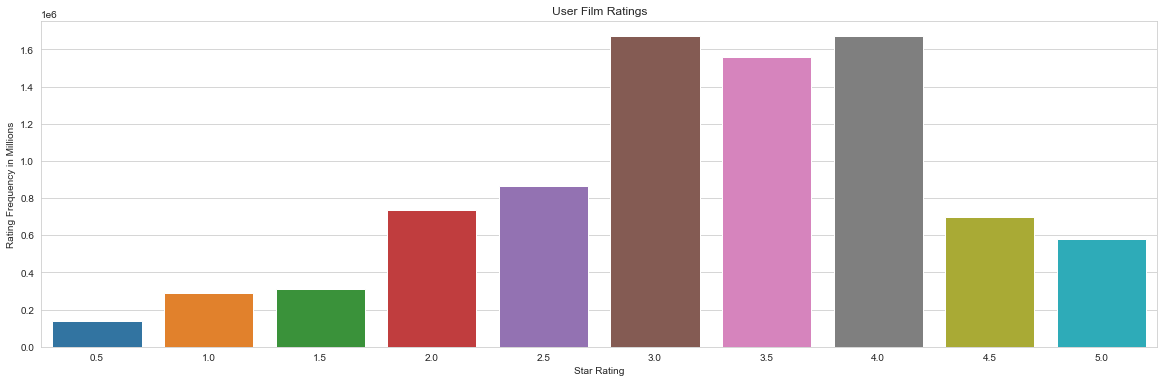

In [23]:
# visualize distribution of ratings 

f = plt.figure(figsize=(20, 6))
sns.set_style(style="whitegrid")
ax = sns.countplot(data=df_vis, x=df_vis['stars'], orient="v")
ax.set(xlabel='Star Rating', ylabel='Rating Frequency in Millions')
plt.title("User Film Ratings");

This is certainly more telling in a visual format. Now, let's order our data to see how films are most often rated.

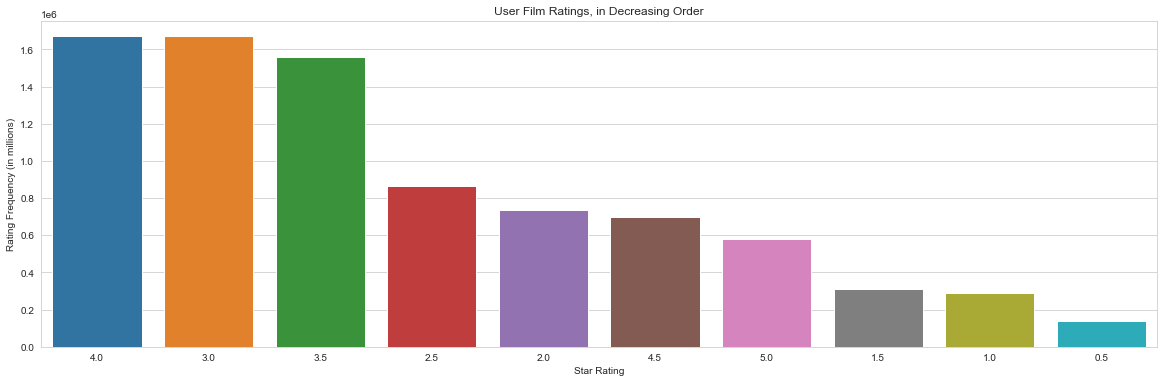

In [24]:
# visualize distribution of ratings, ordered from highest to lowest frequency

f = plt.figure(figsize=(20, 6))
#sns.set_style("dark")
ax2 = sns.countplot(data=df_vis, x=df_vis['stars'], order=df_vis['stars'].value_counts().index, orient="v")
ax2.set(xlabel='Star Rating', ylabel='Rating Frequency (in millions)')
plt.title("User Film Ratings, in Decreasing Order");

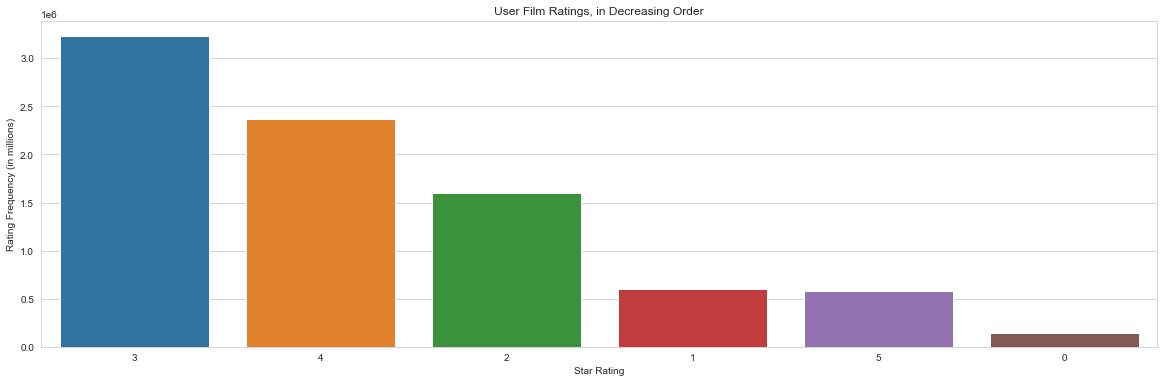

In [25]:
# see what it'd look like as int vs float

df_vis['stars'] = df_vis['rating_val'].map({1: 0, 2: 1, 3: 1, 4: 2, 5: 2, 6: 3, 7: 3, 8: 4, 9: 4, 10: 5})

# visualize distribution of ratings, ordered from highest to lowest frequency

f = plt.figure(figsize=(20, 6))
#sns.set_style("dark")
ax2 = sns.countplot(data=df_vis, x=df_vis['stars'], order=df_vis['stars'].value_counts().index, orient="v")
ax2.set(xlabel='Star Rating', ylabel='Rating Frequency (in millions)')
plt.title("User Film Ratings, in Decreasing Order");

From this chart, we can see that most films in our dataset are rated 6-8 on our 10 point scale (or 3-4 stars in Letterboxd). The films with the worst ratings tend to be much more sparse - so, we might infer that top Letterboxd user's tend to rate films they enjoy.

It'd be interesting to dive deeper into what spurs a review - say if there's an incentive to develop authority on the app, if they're creating a catalogue of previously watched films (where favorites would be most recallable in memory), or if these film lovers tend to watch and rate films they're more likely due to enjoy because of developed and understood preferences. This would not eliminate the need for our recommender system, still, but instead would mean the inclusion of qualitative data pre and post deployment could prove even more valuable. I also find it significant that 5 star ratings (9-10 on our scale above) and essentially ratings on both extreme sides of the spectrum are less frequent. I think the psycological reasons why might prove valuable and telling. This could make our research more interesting or influence product development in order to gain as close to accurate ratings as possible.

I think further understanding the amount of reviews from distinct Letterboxd users could also help us better understand their related psycolographics and behavior.

If one user represents a group of film critics that come out with their favorite film of the week, this is worth knowing.

### Which films garner the most ratings amongst Letterboxd users?

In [26]:
# see the distrubtion of ratings each film has
df_mer['movie_id'].value_counts()

get-out-2017                     3762
parasite-2019                    3761
knives-out-2019                  3628
once-upon-a-time-in-hollywood    3586
lady-bird                        3570
                                 ... 
asi-es-madrid                       1
welcome_homeexe                     1
morat-balas-perdidas                1
alexithymia                         1
or-our-budapest                     1
Name: movie_id, Length: 230858, dtype: int64

In [27]:
df_mer['movie_id'].value_counts().sort_index().nlargest(30)

get-out-2017                        3762
parasite-2019                       3761
knives-out-2019                     3628
once-upon-a-time-in-hollywood       3586
lady-bird                           3570
baby-driver                         3517
la-la-land                          3497
gone-girl                           3486
joker-2019                          3452
us-2019                             3443
arrival-2016                        3437
hereditary                          3422
star-wars-the-force-awakens         3421
mad-max-fury-road                   3404
spider-man-into-the-spider-verse    3404
midsommar                           3389
a-quiet-place-2018                  3371
star-wars-the-last-jedi             3365
guardians-of-the-galaxy             3342
the-shining                         3334
whiplash-2014                       3324
black-panther                       3315
the-grand-budapest-hotel            3302
dunkirk-2017                        3294
uncut-gems      

In [28]:
date_idx = pd.to_datetime(df_vis.year_released.astype(int),format='%Y')
date_idx.dt.year

0          2020
1          2020
2          2020
3          2020
4          2020
           ... 
8528435    1973
8528436    2015
8528437    1975
8528438    2012
8528439    2018
Name: year_released, Length: 8528440, dtype: int64

<AxesSubplot:xlabel='year_released'>

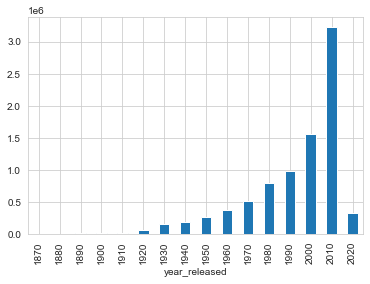

In [29]:
df_vis.groupby((date_idx.dt.year // 10) * 10).count().iloc[:,0].plot(kind='bar')

# save series, and use with seaborn to look prettier, further develop analysis


The most frequently rated films are clearly the more recent hits of the past decade, along with top-rated classics in the film world like The Shinning. Since Letterboxd was created in 2011 - it seems like the majority of reviews are likely rated upon being watched (versus say creating an archive of previously seen films to rate).

This also perhaps begs deeper questions of if recently released films would incentivize folks to rate the film publicly, if users represent companies or more high-profile users, and more. This would be interesting to explore with team interviews and by diving deeper into top-users themselves and their qualififcations/related-criteria.

### How many films do our users typically rate?

The scraper we obtained specifically lists these folks as representative of the very top Letterboxd users - so let's better understand how many films the top Letterboxd users rate. This should help us better gauge what dictates a user is considered "top" or a "film lover" from the social networking app. It'll also begin to shed light on user profiles and help us understand how user similarities might be created or dissected later during our modeling phase.

In [30]:
# see the range of reviews users have completed

df_vis['user_id'].value_counts()

acervofilmico      73993
ghettominibar      24388
punq               23828
loureviews         22202
thecinema4pylon    20371
                   ...  
brunadnts              1
oski99                 1
john209                1
scottnye               1
lilfilm                1
Name: user_id, Length: 4501, dtype: int64

OPTIONAL PERCENTILES:

I find it interesting that users with only one film review are included here. Does this mean there are a significant amount of users on Letterboxd who have not rated a film at all or is there another gauage to determine "top" users. It's worth noting that there reportedly are at least X users total on app within the period this data was scraped - and we have 4,501 represented within our data.

In [31]:
# see the amount of users with only one film reviewed


# percentage of total

# average rating across users (and varying ways of dictating average)

# users with one film rating

# users with over 1K

# #df_mer['user_id'].value_counts() == 1

# bring in percentiles

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


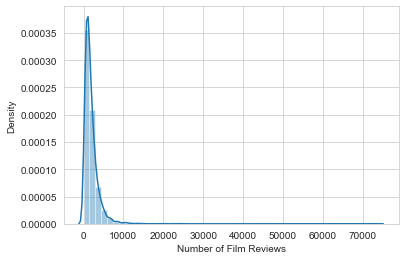

In [32]:
# see the full distribution of user film reviews

df_viz_u = df_vis['user_id'].value_counts()
x = pd.Series(df_viz_u, name="Number of Film Reviews")
ax = sns.distplot(x)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


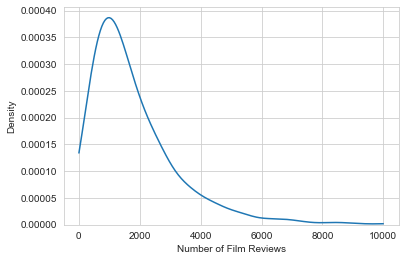

In [33]:
# zero in on our distribution to better understand the typical amount of user reviews

ax = sns.distplot(x, hist=False, kde_kws={'clip': (0.0, 10000.00)});

OPTIONAL PERCENTILE:
How many of our users have only rated one film? This makes me wonder why Sam (scraper) listed these as the top. What qualifies them?

In [34]:
# average rating across users (and varying ways of dictating average)

# users with one film rating

# users with over 1K

# #df_mer['user_id'].value_counts() == 1

# bring in percentiles

We can see that many users lie outside the typical range of activity (films reviewed). With additional time, it might be worth revisiting how we might trim our ratings data based off of this and see if we can further tune our model's accuracy.

## Ensure our merged dataset is ready for our recommendation system

In our next notebook, we'll use the surprise library to bring both K-Nearest Neighbor (KNN) and Standard (SVD) model approaches to our dataset.

Surprise, a loose abbreviation for X, needs to have only three columns of data present - the user, item, and rating.

We'll need to modify our merged set to ensure only the following columns of data are present: `user_id`, `movie_id`, and `rating_id`.

In [35]:
# prove reason we're dropping title by taking unique number of each, to see the difference
# or bring up a few examples within the same movie_title to see the disparate id

Please note above, while `movie_title` also signifies the film in question (aka the item), there are duplicates within this column even for disparate `movie_id`'s. This tells us `movie_id` is the right choice to ensure we're not innacurately understanding film ratings.

In [36]:
# create df ready for model-based approach
df = df_mer.copy()
df.drop(columns=['image_url', 'movie_title', 'year_released'], inplace=True)

In [37]:
df.head()

,movie_id,rating_val,user_id
0,happiest-season,8,deathproof
1,happiest-season,7,davidehrlich
2,happiest-season,4,ingridgoeswest
3,happiest-season,7,silentdawn
4,happiest-season,2,colonelmortimer


Now, we're ready to start modeling in order to predict the best film recommendations. Let's ensure we can bring our resulting dataframe into our modeling notebook here.(link)

In [38]:
# pickle for saving df for modeling and our gridsearch
import pickle
pickle.dump(df,open("df.pkl", "wb")) #write bytes